# Correlation between the Seven Datasets

## Overview
In this file we are looking at the correlation of six metabolic risk factors with the mortality dataset.
### Key section:
1. Datasets 
2. SQL connection and inserting Data in SQL 
4. Exploratory data analysis for Mortality
5. Correaltaion of the Metabolic factors with Behavioral factors
6. Regression Analysis: Correaltaion of the sic factors with each diseas in Mortality Dataset

## Datasets:</br>
Tobacco Dataset:</br>
https://www.who.int/data/gho/data/indicators/indicator-details/GHO/gho-tobacco-control-monitor-current-tobaccouse-tobaccosmoking-cigarrettesmoking-agestd-tobagestdcurr</br>
Physical Inactivity:</br>
 https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-insufficient-physical-activity-among-adults-aged-18-years-(age-standardized-estimate)-(-)</br>
Alcohol:</br>
https://www.who.int/data/gho/data/indicators/indicator-details/GHO/total-(recorded-unrecorded)-alcohol-per-capita-(15-)-consumption</br>
Cholesterol:</br>
https://www.who.int/data/gho/data/indicators/indicator-details/GHO/mean-total-cholesterol-(age-standardized-estimate)</br>
Hypertension:</br>
https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-hypertension-among-adults-aged-30-79-years</br>
Obesity:</br>
 https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-obesity-among-adults-bmi--30-(age-standardized-estimate)-(-)</br>
Mortality Dataset:</br>
https://www.who.int/data/gho/data/indicators/indicator-details/GHO/number-of-deaths-attributed-to-non-communicable-diseases-by-type-of-disease-and-sex</br>


In [1]:
import pandas as pd
import sqlalchemy as sq
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [7]:
obesity=pd.read_csv(r"Data\Global_Obesity.csv", encoding='ISO-8859-1')
alchohol=pd.read_csv(r"Data\Global_Alcohol.csv", encoding='ISO-8859-1')
cholesterol=pd.read_csv(r"Data\Global_Cholesterol.csv", encoding='ISO-8859-1')
phy_inactivity=pd.read_csv(r"Data\Global_Physical Inactivity.csv", encoding='ISO-8859-1')
hypertension=pd.read_csv(r"Data\Global_Hypertension.csv", encoding='ISO-8859-1')
#Tobacco and Mortality data already exist in my SQL Server

## 2. SQL Connection, Renaming Columns and inserting to SQL
Note: Tobacco and mortality data already exists in my SQL server. Therfore only inserting remaining five datasets

In [3]:
username = 'root'
password = 'abc123'
host = 'localhost'  
port = '3306'       
database = 'project'

connection_url = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
engine = sq.create_engine(connection_url)

In [17]:
obesity.rename(columns={"Indicator":"Indicator", "ParentLocation":"Region", "Location":"Country", "Period":"Year",
                         "Dim1":"Gender", "FactValueNumeric":"obesity_value", "FactValueNumericLow": "obesity_value_low",
                           "FactValueNumericHigh":"obesity_value_high", "Value": "obesity_range"}, inplace=True)

#inserting Obesity data in sql table
obesity.to_sql("obesity", engine, index=False,if_exists='replace')
obesity = pd.read_sql_table("obesity", engine)
obesity.head()

,Indicator,Region,Country,Year,Gender,obesity_value,obesity_value_low,obesity_value_high,obesity_range
0,"Prevalence of obesity among adults, BMI &Great...",Africa,Ethiopia,2022,Male,1.06,0.60,1.69,1.1 [0.6-1.7]
1,"Prevalence of obesity among adults, BMI &Great...",South-East Asia,Timor-Leste,2022,Male,1.56,0.87,2.54,1.6 [0.9-2.5]
2,"Prevalence of obesity among adults, BMI &Great...",Africa,Rwanda,2022,Male,1.76,1.16,2.56,1.8 [1.2-2.6]
3,"Prevalence of obesity among adults, BMI &Great...",Western Pacific,Viet Nam,2022,Male,1.93,1.26,2.77,1.9 [1.3-2.8]
4,"Prevalence of obesity among adults, BMI &Great...",Eastern Mediterranean,Yemen,2022,Male,10.13,6.01,15.78,10.1 [6.0-15.8]


In [18]:
#renaming columns for Alchohol dataset
alchohol.rename(columns={"Indicator":"Indicator", "ParentLocation":"Region", "Location":"Country", "Period":"Year",
                         "Dim1":"Gender", "FactValueNumeric":"alchohol_value", "FactValueNumericLow": "alcohol_value_low",
                           "FactValueNumericHigh":"alchohol_value_high", "Value": "alchohol_range"}, inplace=True)

#inserting Alchohol data in sql table
alchohol.to_sql("alchohol", engine, index=False,if_exists='replace')
alchohol = pd.read_sql_table("alchohol", engine)
alchohol.head()

,Indicator,Region,Country,Year,Gender,alchohol_value,alcohol_value_low,alchohol_value_high,alchohol_range
0,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Afghanistan,2020,Female,0.0,0.0,0.027,0.0 [0.0 - 0.0]
1,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Kuwait,2020,Both sexes,0.0,0.0,0.000,0.0 [0.0 - 0.0]
2,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Kuwait,2020,Female,0.0,0.0,0.000,0.0 [0.0 - 0.0]
3,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Kuwait,2020,Male,0.0,0.0,0.000,0.0 [0.0 - 0.0]
4,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Libya,2020,Female,0.0,0.0,0.036,0.0 [0.0 - 0.0]


In [19]:
#renaming columns for cholesterol dataset
cholesterol.rename(columns={"Indicator":"Indicator", "ParentLocation":"Region", "Location":"Country", "Period":"Year",
                         "Dim1":"Gender", "FactValueNumeric":"cholesterol_value", "FactValueNumericLow": "cholesterol_value_low",
                           "FactValueNumericHigh":"cholesterol_value_high", "Value": "cholesterol_range"}, inplace=True)

#inserting cholesterol data in sql table
cholesterol.to_sql("cholesterol", engine, index=False,if_exists='replace')
cholesterol = pd.read_sql_table("cholesterol", engine)
cholesterol.head()

,Indicator,Region,Country,Year,Gender,cholesterol_value,cholesterol_value_low,cholesterol_value_high,cholesterol_range
0,"Mean total cholesterol, age-standardized",Africa,Lesotho,2018,Male,3.6,3.1,4.1,3.6 [3.1-4.1]
1,"Mean total cholesterol, age-standardized",Africa,Rwanda,2018,Male,3.6,3.2,4.1,3.6 [3.2-4.1]
2,"Mean total cholesterol, age-standardized",Africa,Malawi,2018,Male,3.6,3.3,3.9,3.6 [3.3-3.9]
3,"Mean total cholesterol, age-standardized",Africa,Nigeria,2018,Male,3.7,3.1,4.3,3.7 [3.1-4.3]
4,"Mean total cholesterol, age-standardized",Africa,Burkina Faso,2018,Male,3.7,3.2,4.1,3.7 [3.2-4.1]


In [20]:
#renaming columns for phy_inactivity dataset
phy_inactivity.rename(columns={"Indicator":"Indicator", "ParentLocation":"Region", "Location":"Country", "Period":"Year",
                         "Dim1":"Gender", "FactValueNumeric":"phy_inactivity_value", "FactValueNumericLow": "phy_inactivity_value_low",
                           "FactValueNumericHigh":"phy_inactivity_value_high", "Value": "phy_inactivity_range"}, inplace=True)

#inserting phy_inactivity data in sql table
phy_inactivity.to_sql("phy_inactivity", engine, index=False,if_exists='replace')
phy_inactivity = pd.read_sql_table("phy_inactivity", engine)
phy_inactivity.head()

,Indicator,Region,Country,Year,Gender,phy_inactivity_value,phy_inactivity_value_low,phy_inactivity_value_high,phy_inactivity_range
0,Prevalence of insufficient physical activity a...,Africa,Rwanda,2022,Female,10.07,5.16,17.09,10.1 [5.2-17.1]
1,Prevalence of insufficient physical activity a...,South-East Asia,Nepal,2022,Male,10.45,5.15,17.74,10.4 [5.1-17.7]
2,Prevalence of insufficient physical activity a...,Africa,Comoros,2022,Male,10.54,3.13,24.20,10.5 [3.1-24.2]
3,Prevalence of insufficient physical activity a...,Europe,Netherlands (Kingdom of the),2022,Female,10.71,6.66,15.73,10.7 [6.7-15.7]
4,Prevalence of insufficient physical activity a...,Europe,Turkmenistan,2022,Male,10.82,4.53,19.54,10.8 [4.5-19.5]


In [21]:
#renaming columns for hypertension dataset
hypertension.rename(columns={"Indicator":"Indicator", "ParentLocation":"Region", "Location":"Country", "Period":"Year",
                         "Dim1":"Gender", "FactValueNumeric":"hypertension_value", "FactValueNumericLow": "hypertension_value_low",
                           "FactValueNumericHigh":"hypertension_value_high", "Value": "hypertension_range"}, inplace=True)

#inserting cholesterol data in sql table
hypertension.to_sql("hypertension", engine, index=False,if_exists='replace')
hypertension = pd.read_sql_table("hypertension", engine)
hypertension.head()

,Indicator,Region,Country,Year,Gender,hypertension_value,hypertension_value_low,hypertension_value_high,hypertension_range
0,Prevalence of hypertension among adults aged 3...,Europe,Switzerland,2019,Female,17.5,11.9,24.2,17.5 [11.9-24.2]
1,Prevalence of hypertension among adults aged 3...,Americas,Peru,2019,Female,18.4,15.3,21.8,18.4 [15.3-21.8]
2,Prevalence of hypertension among adults aged 3...,Americas,Canada,2019,Female,19.9,16.0,24.4,19.9 [16.0-24.4]
3,Prevalence of hypertension among adults aged 3...,Americas,Peru,2019,Both sexes,20.7,18.2,23.3,20.7 [18.2-23.3]
4,Prevalence of hypertension among adults aged 3...,Europe,Spain,2019,Female,20.8,15.7,26.5,20.8 [15.7-26.5]


## EDA for Mortality DATA

In [6]:
# Rank of Canada for average mortality use in past 18 years among 183 countries
query = """WITH DiseaseRanks AS (SELECT country, disease, AVG(mortality_value) AS avg_mortality FROM mortality 
        WHERE Gender = 'Both sexes' AND Year >= 2000 AND Year <= 2018  GROUP BY country, disease),
        RankedMortality AS (SELECT country, disease, avg_mortality, 
        RANK() OVER (PARTITION BY disease ORDER BY avg_mortality DESC) AS rank_value
        FROM DiseaseRanks) SELECT country, disease, avg_mortality, rank_value 
        FROM RankedMortality WHERE country = 'Canada';"""

print("Canada rank for each disease on average among 183 countries")
ranked_data = pd.read_sql_query(query, engine)
ranked_data.head()

Canada rank for each disease on average among 183 countries


,country,disease,avg_mortality,rank_value
0,Canada,Cardiovascular diseases,69809.894737,37
1,Canada,Diabetes mellitus,7278.263158,31
2,Canada,Malignant neoplasms,72293.421053,21
3,Canada,Respiratory diseases,16830.947368,29


In [9]:
# Rank of Canada for each diesease in 2018 among 183 countries
query="""WITH RankedMortality AS ( SELECT country, disease, mortality_value, RANK() OVER (PARTITION BY disease
    ORDER BY mortality_value DESC) AS rank_value FROM mortality WHERE Gender = 'Both sexes' AND Year = 2018) 
    SELECT country, disease, mortality_value, rank_value FROM RankedMortality WHERE country = 'Canada'; """
ranked_data = pd.read_sql_query(query, engine)
print("Rank of Canada out of 183 countries in 2018")
ranked_data.head()


Rank of Canada out of 183 countries in 2018


,country,disease,mortality_value,rank_value
0,Canada,Cardiovascular diseases,70147.0,39
1,Canada,Diabetes mellitus,6883.0,43
2,Canada,Malignant neoplasms,80881.0,23
3,Canada,Respiratory diseases,19700.0,28


In [10]:
# Rank of Canada for each diesease in 2000 among 183 countries
query="""WITH RankedMortality AS ( SELECT country, disease, mortality_value, RANK() OVER (PARTITION BY disease
    ORDER BY mortality_value DESC) AS rank_value FROM mortality WHERE Gender = 'Both sexes' AND Year = 2000) 
    SELECT country, disease, mortality_value, rank_value FROM RankedMortality WHERE country = 'Canada'; """
ranked_data = pd.read_sql_query(query, engine)
print("Rank of Canada out of 183 countries in 2000")
ranked_data.head()

Rank of Canada out of 183 countries in 2000


,country,disease,mortality_value,rank_value
0,Canada,Cardiovascular diseases,75398.0,34
1,Canada,Diabetes mellitus,6759.0,27
2,Canada,Malignant neoplasms,63429.0,21
3,Canada,Respiratory diseases,14291.0,32


In [15]:
query="""SELECT Country, Year, Gender, mortality_value, disease FROM mortality WHERE country = 'Canada' and Year BETWEEN 2000 AND 2018 and Gender!='Both sexes'
ORDER BY Year DESC, gender; """
result = pd.read_sql_query(query, engine)
result.head(16)

,Country,Year,Gender,mortality_value,disease
0,Canada,2018,Female,2994.0,Diabetes mellitus
1,Canada,2018,Female,34074.0,Cardiovascular diseases
2,Canada,2018,Female,38261.0,Malignant neoplasms
3,Canada,2018,Female,9603.0,Respiratory diseases
4,Canada,2018,Male,10097.0,Respiratory diseases
5,Canada,2018,Male,36074.0,Cardiovascular diseases
6,Canada,2018,Male,3889.0,Diabetes mellitus
7,Canada,2018,Male,42620.0,Malignant neoplasms
8,Canada,2017,Female,3032.0,Diabetes mellitus
9,Canada,2017,Female,34501.0,Cardiovascular diseases


### Visualization

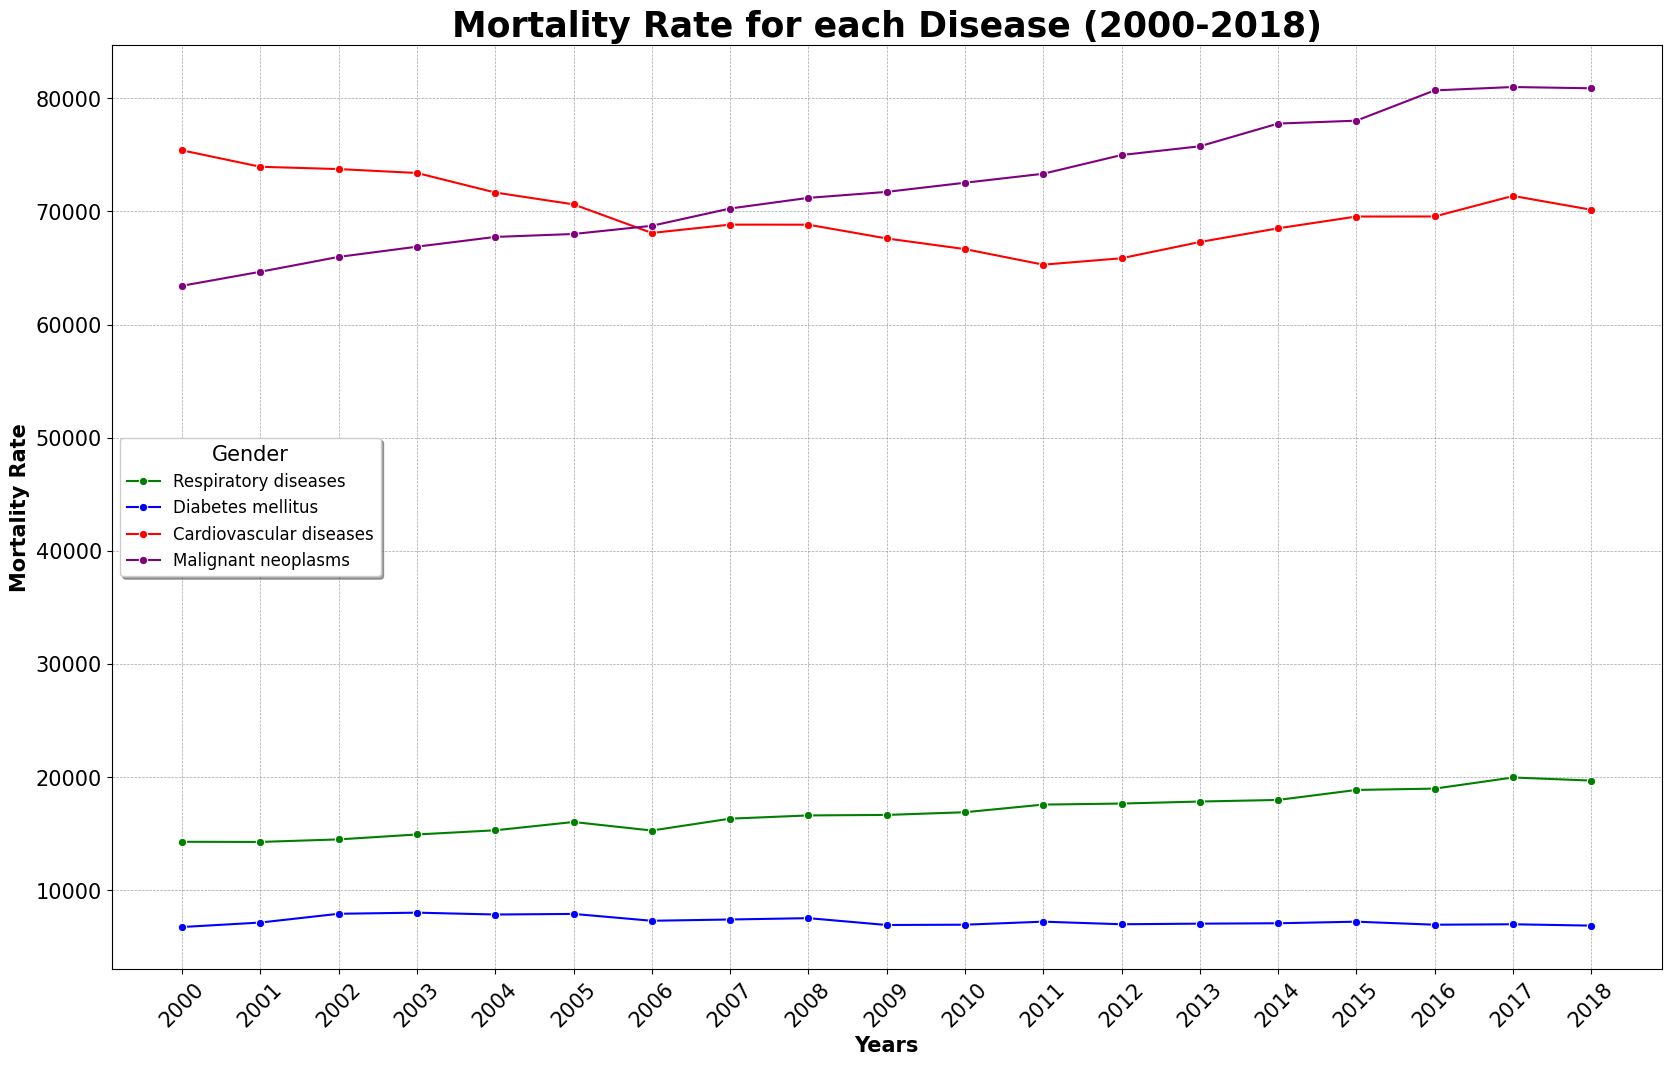

In [ ]:
#Trend line for Mortality rate in canada from 2000-2018
query = """SELECT Year, Gender, mortality_value, disease FROM mortality where year<=2018 and country='Canada' and Gender='Both sexes';"""   
canada_mortality=pd.read_sql_query(query, engine)
canada_mortality['Year'] = canada_mortality['Year'].astype(int)
plt.figure(figsize=(20, 12))

sns.lineplot(data=canada_mortality, x=canada_mortality['Year'], y=canada_mortality['mortality_value'], hue='disease', marker='o', markersize=6, palette=['Green','Blue', 'Red', 'Purple'])
plt.title("Mortality Rate for each Disease (2000-2018)", fontsize=25, weight='bold')
plt.xlabel("Years", fontsize=15,weight='bold')
plt.ylabel("Mortality Rate", fontsize=15, weight='bold')
plt.legend(frameon=True, shadow=True, loc='center left',fontsize=12,title="Gender", title_fontsize=15)
years = canada_mortality['Year'].unique() 
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(years, rotation=45)
plt.xticks(ticks=years, labels=years, rotation=45,fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.savefig("Visuals/Mortality Trend.png", format='png', dpi=300)
plt.show()


## Correlation of the Six Factors

In [4]:
query="""SELECT t.Country, t.Year, t.Gender, t.tobacco_value, o.obesity_value, a.alchohol_value, c.cholesterol_value, 
ph.phy_inactivity_value, h.hypertension_value FROM tobacco t
JOIN obesity o ON t.Year = o.Year AND t.Gender = o.Gender and t.country=o.country
JOIN alchohol a ON t.Year = a.Year AND t.Gender = a.Gender and t.country=a.country
JOIN cholesterol c ON t.Year = c.Year AND t.Gender = c.Gender and t.country=c.country
JOIN phy_inactivity ph ON t.Year = ph.Year AND t.Gender = ph.Gender and t.country=ph.country
JOIN hypertension h ON t.Year = h.Year AND t.Gender = h.Gender and t.country=h.country
WHERE t.Country = 'Canada' AND t.Year BETWEEN 2000 AND 2018;"""
result=pd.read_sql_query(query, engine)
result.rename(columns={'tobacco_value':'Tobacco', 'obesity_value':'Obesity' ,'alchohol_value' : 'Alcohol','cholesterol_value' : 'Cholesterol',
                        'phy_inactivity_value': 'Physical Inactivity', 'hypertension_value' : 'Hypertension'}, inplace=True)
result.head()

,Country,Year,Gender,Tobacco,Obesity,Alcohol,Cholesterol,Physical Inactivity,Hypertension
0,Canada,2018,Male,16.75,26.63,15.59,4.6,33.44,24.5
1,Canada,2018,Both sexes,14.40,25.57,9.90,4.6,35.07,22.4
2,Canada,2018,Female,12.10,24.53,4.34,4.7,36.69,20.2
3,Canada,2017,Male,16.75,26.41,15.68,4.6,32.89,24.8
4,Canada,2017,Both sexes,14.40,25.43,9.95,4.7,34.56,22.6


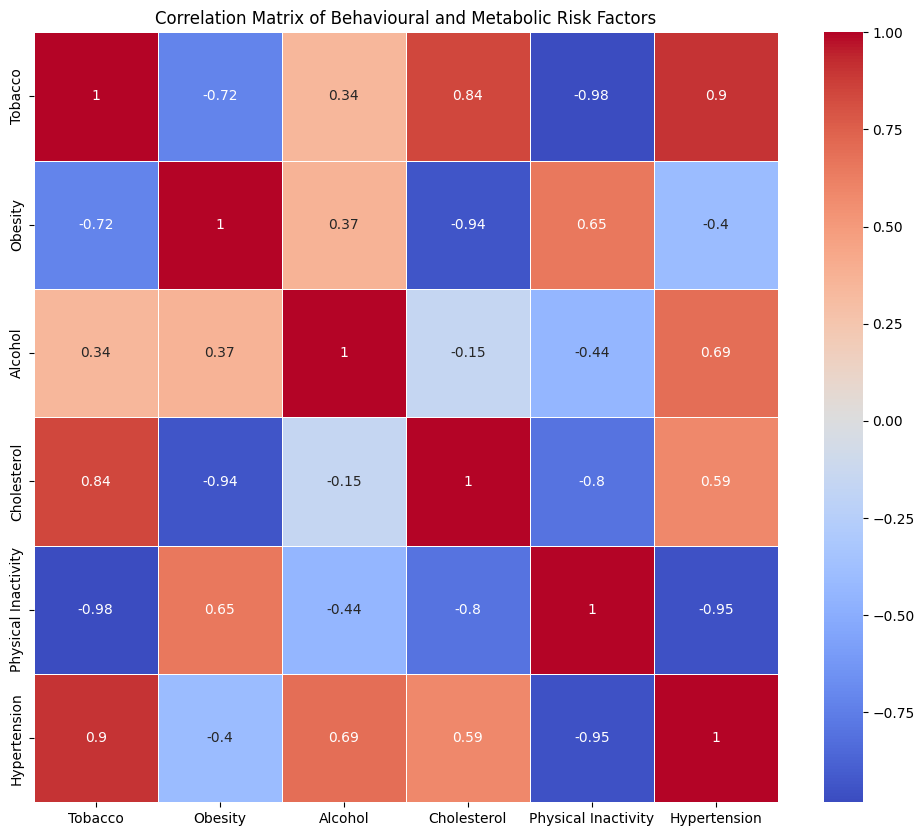

In [5]:
#select only numerical columns 
factors = result.iloc[:, 3:]
correlation_matrix = factors.corr()
#plotting correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Behavioural and Metabolic Risk Factors')
plt.savefig(f"Visuals/Correlation btw factors.png", format='png', dpi=300)
plt.show()

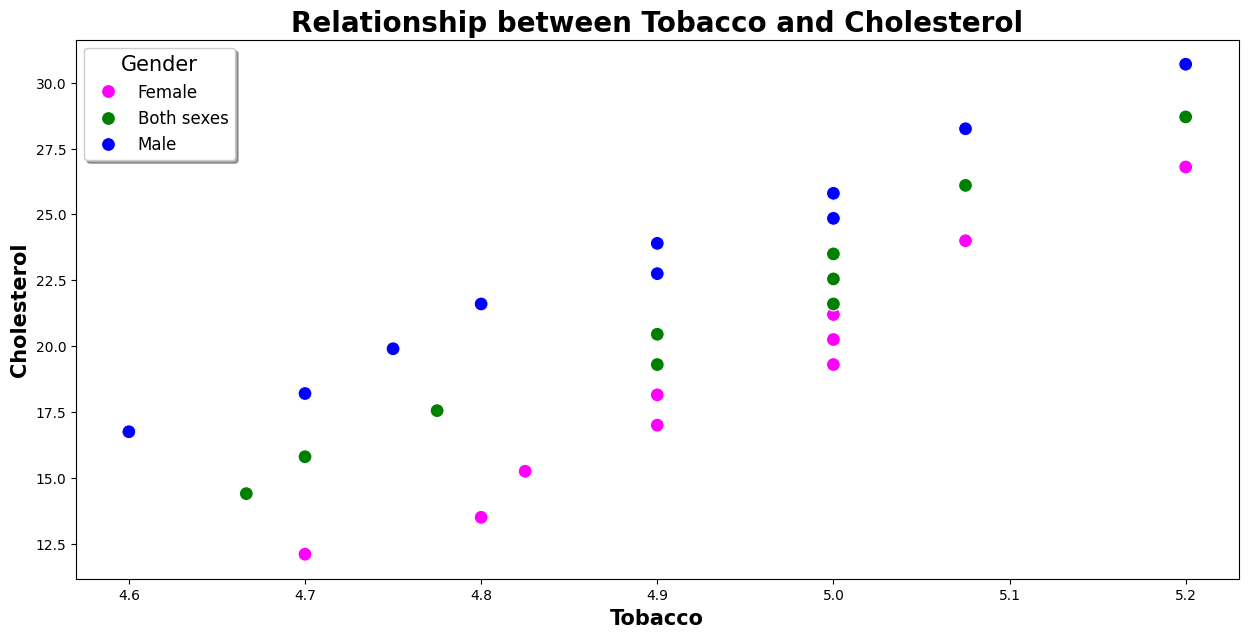

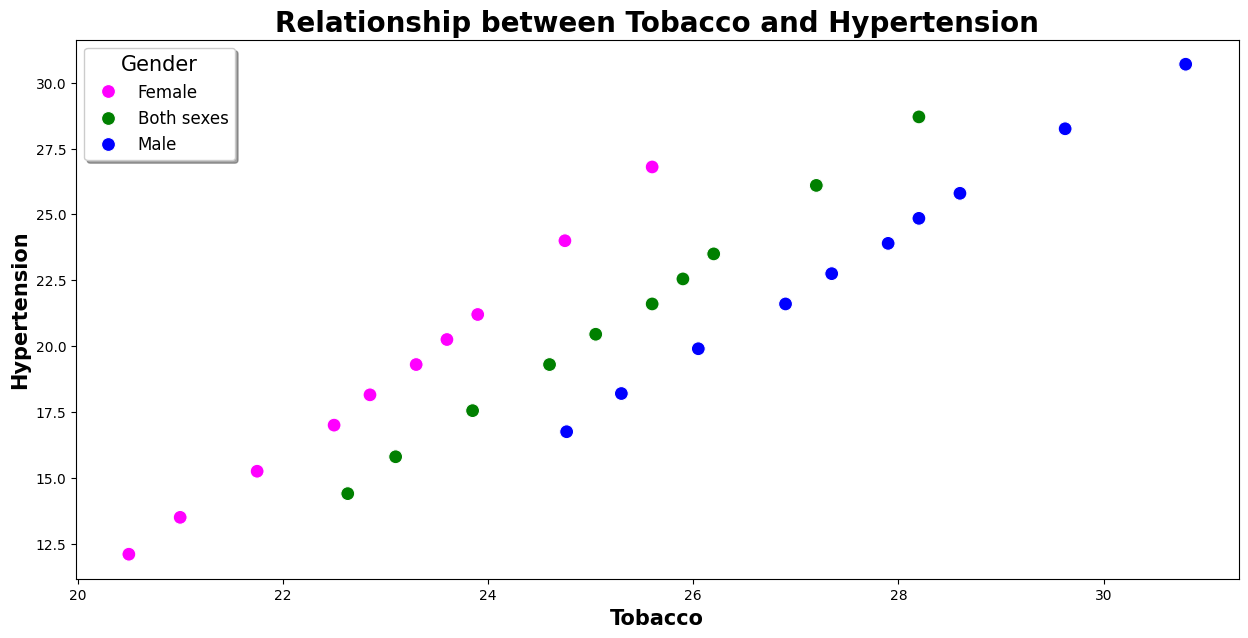

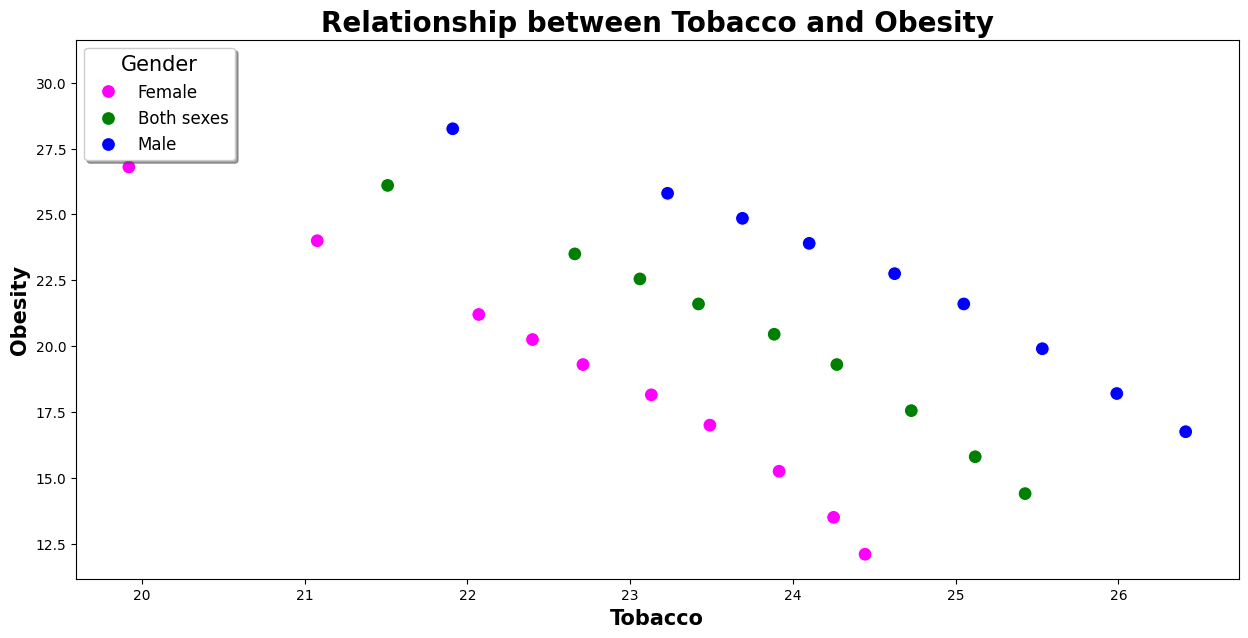

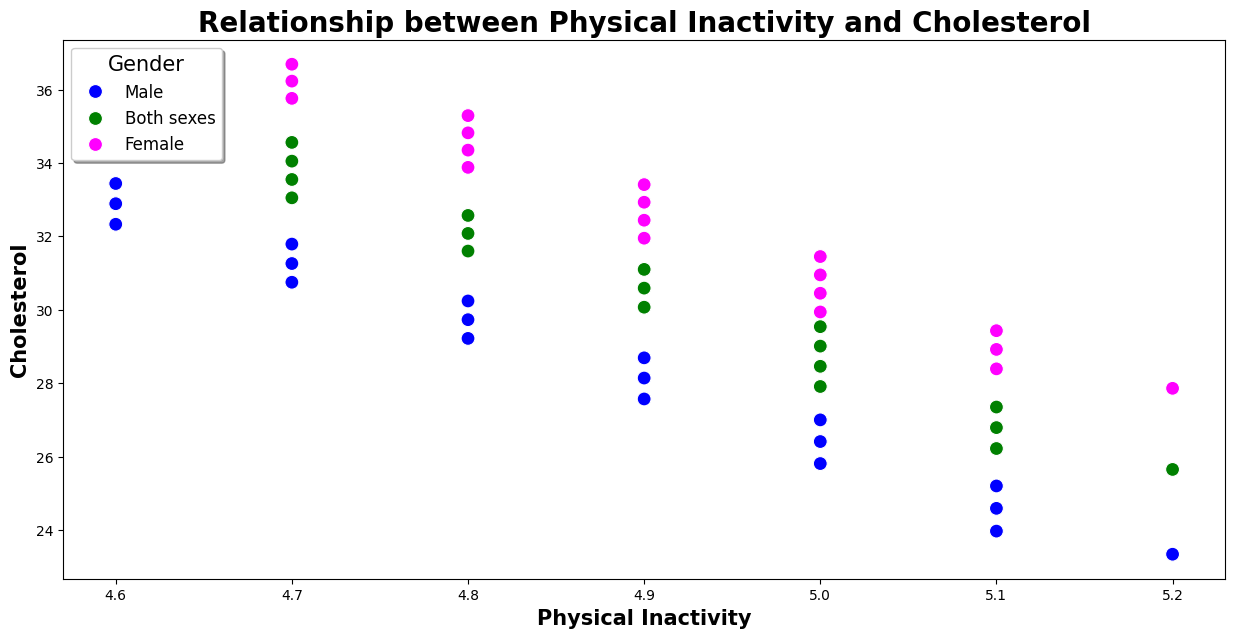

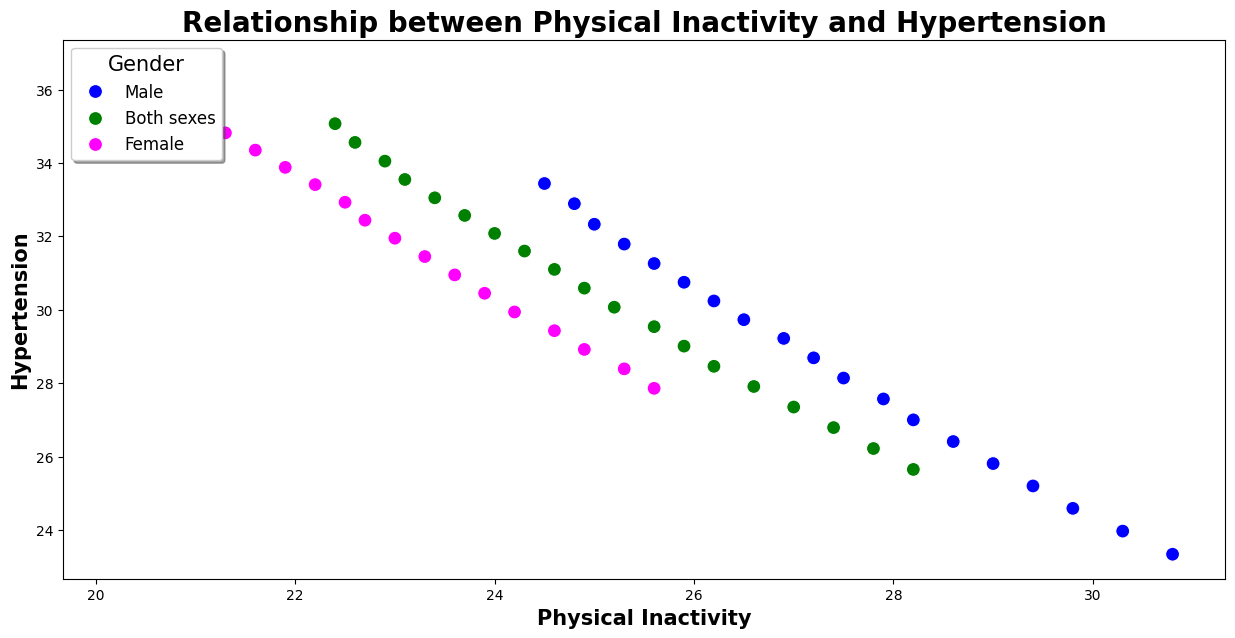

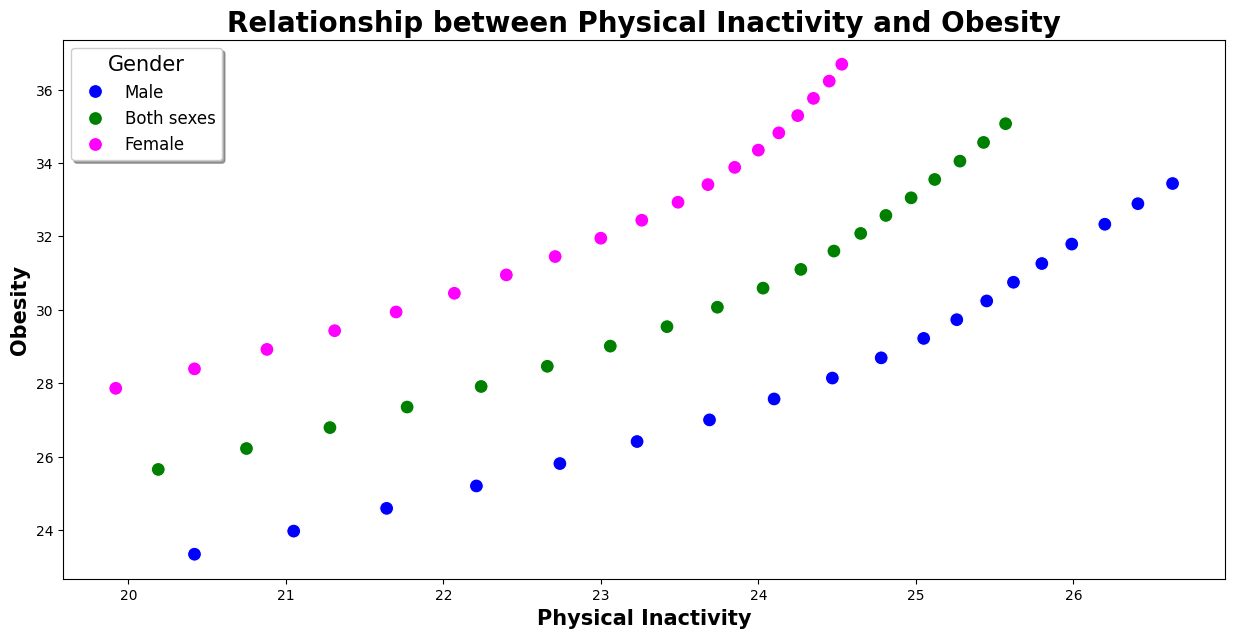

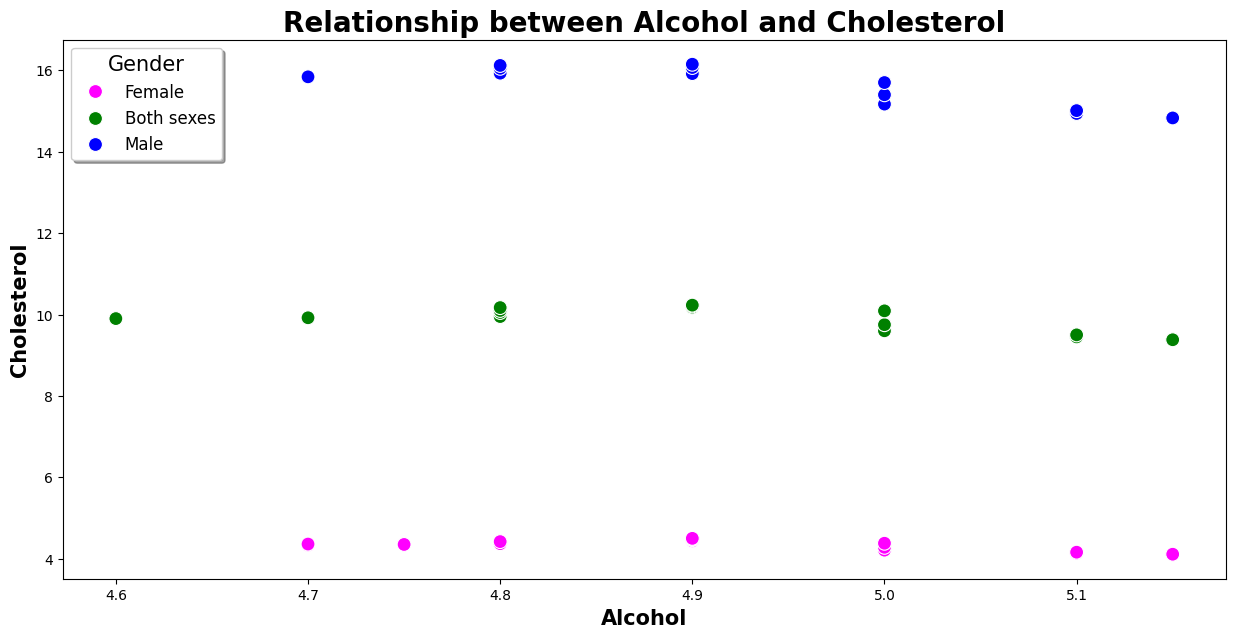

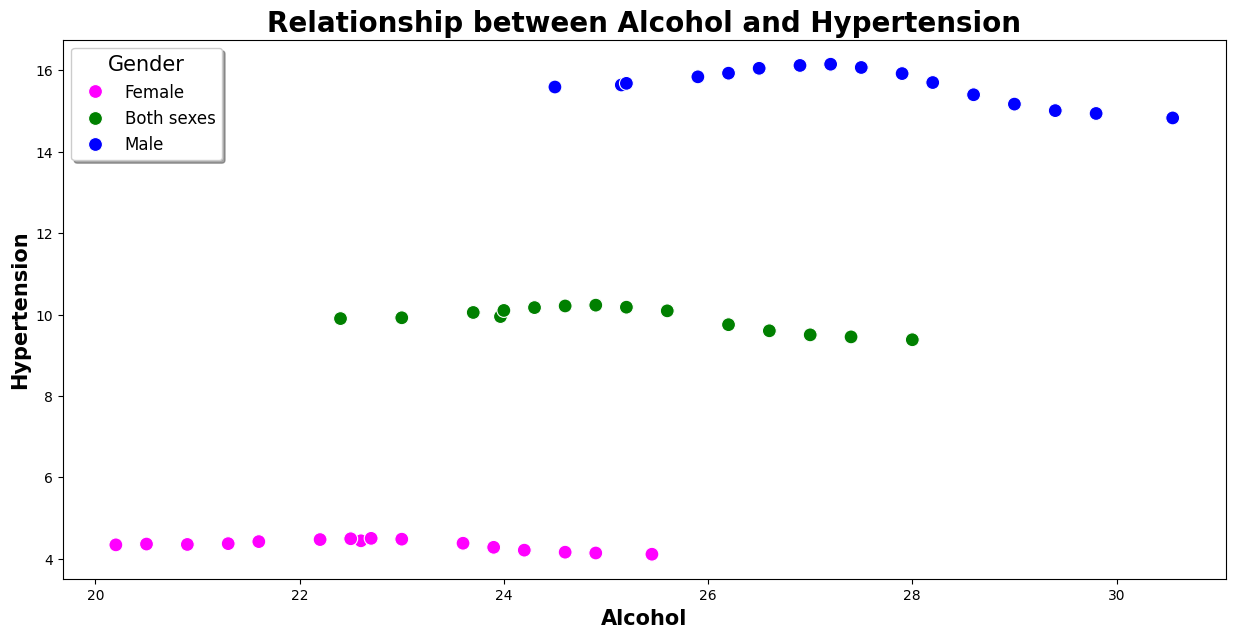

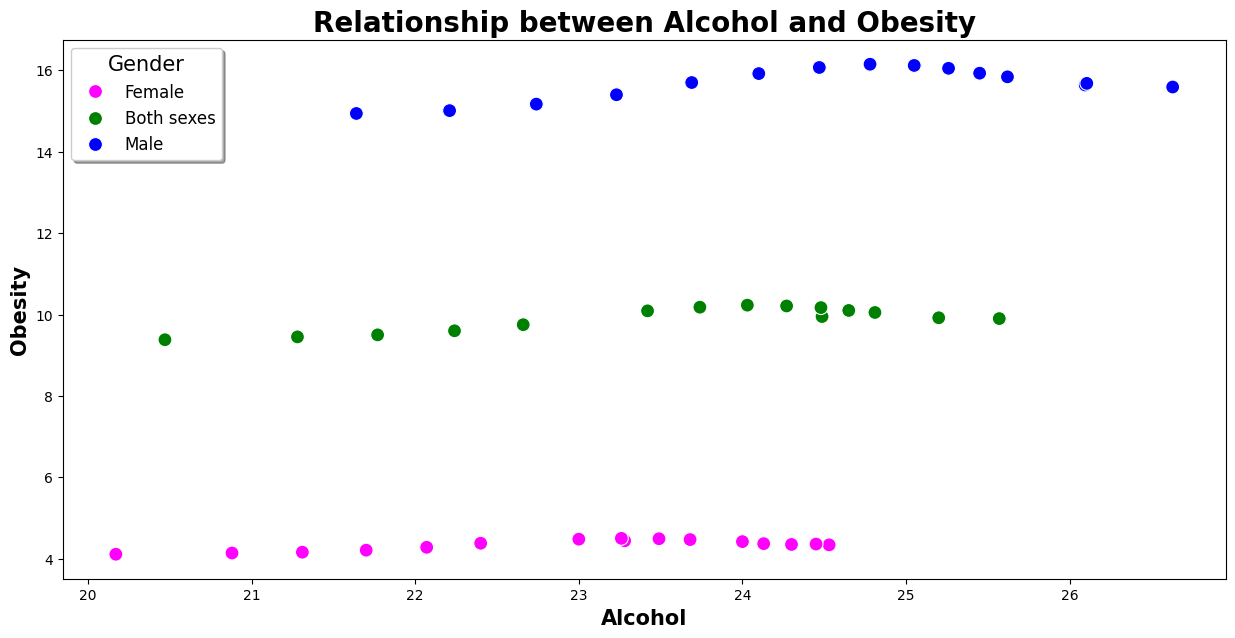

In [6]:
#plotting scatter plot for for each behavioral factor against metabolic factors
metabolic_factors=['Cholesterol', 'Hypertension', 'Obesity']
behavioural_factors=['Tobacco', 'Physical Inactivity', 'Alcohol']
for bfactor in behavioural_factors: 
    for factor in metabolic_factors:
        aggregated = result.groupby([bfactor, 'Gender'])[factor].mean().reset_index()
        plt.figure(figsize=(15, 7))
        sns.scatterplot(data=aggregated, x=factor, y=bfactor, hue='Gender', palette={'Female':'Magenta','Both sexes':'Green', 'Male':'Blue'}, s=100)
        plt.title(f"Relationship between {bfactor} and {factor}", fontsize=20, weight='bold')
        plt.xlabel(f"{bfactor}",  fontsize=15,weight='bold')
        plt.ylabel(f"{factor}",  fontsize=15, weight='bold')
        plt.legend(frameon=True, shadow=True, loc='upper left',fontsize=12,title="Gender", title_fontsize=15)
        plt.savefig(f"Visuals/{bfactor} vs {factor}.png", format='png', dpi=300)
        plt.show()

## Regression for Each disease 

In [ ]:
# Joining all seven datasets
query = """SELECT t.Country, t.Year, t.Gender, t.tobacco_value, o.obesity_value, a.alchohol_value, c.cholesterol_value, 
ph.phy_inactivity_value, h.hypertension_value, m.mortality_value, m.Disease FROM tobacco t
JOIN obesity o ON t.Year = o.Year AND t.Gender = o.Gender and t.country=o.country
JOIN alchohol a ON t.Year = a.Year AND t.Gender = a.Gender and t.country=a.country
JOIN cholesterol c ON t.Year = c.Year AND t.Gender = c.Gender and t.country=c.country
JOIN phy_inactivity ph ON t.Year = ph.Year AND t.Gender = ph.Gender and t.country=ph.country
JOIN hypertension h ON t.Year = h.Year AND t.Gender = h.Gender and t.country=h.country
JOIN mortality m ON t.Year = m.Year AND t.Gender = m.Gender and t.country=m.country
WHERE t.Country = 'Canada' AND t.Year BETWEEN 2000 AND 2018 AND t.Gender != 'Both sexes';"""
result=pd.read_sql_query(query, engine)
result.rename(columns={'tobacco_value':'Tobacco', 'obesity_value':'Obesity' ,'alchohol_value' : 'Alcohol','cholesterol_value' : 'Cholesterol',
                        'phy_inactivity_value': 'Physical Inactivity', 'hypertension_value' : 'Hypertension', 'mortality_value':'Mortality'}, inplace=True)
result.head()

,Country,Year,Gender,Tobacco,Obesity,Alcohol,Cholesterol,Physical Inactivity,Hypertension,Mortality,Disease
0,Canada,2018,Male,16.75,26.63,15.59,4.6,33.44,24.5,10097.0,Respiratory diseases
1,Canada,2018,Female,12.10,24.53,4.34,4.7,36.69,20.2,2994.0,Diabetes mellitus
2,Canada,2018,Female,12.10,24.53,4.34,4.7,36.69,20.2,34074.0,Cardiovascular diseases
3,Canada,2018,Male,16.75,26.63,15.59,4.6,33.44,24.5,36074.0,Cardiovascular diseases
4,Canada,2018,Female,12.10,24.53,4.34,4.7,36.69,20.2,38261.0,Malignant neoplasms


### Respiratory Disease

In [ ]:
# extract respiratory disease data from above query
X = result[result['Disease'] == 'Respiratory diseases'][['Tobacco', 'Obesity', 'Alcohol', 'Cholesterol', 'Physical Inactivity', 'Hypertension']]
y = result[result['Disease'] == 'Respiratory diseases'][[ 'Mortality']]

# regression
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Mortality   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.040e+04
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                    3.49e-51
Time:                        00:36:23   Log-Likelihood:                         -253.67
No. Observations:                  38   AIC:                                      519.3
Df Residuals:                      32   BIC:                                      529.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Cradiovascular Disease

In [ ]:
# extract Cardio disease data from above query
X = result[result['Disease'] == 'Cardiovascular diseases'][['Tobacco', 'Obesity', 'Alcohol', 'Cholesterol', 'Physical Inactivity', 'Hypertension']]
y = result[result['Disease'] == 'Cardiovascular diseases'][[ 'Mortality']]

# regression
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Mortality   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.228e+04
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                    2.44e-52
Time:                        00:36:24   Log-Likelihood:                         -304.35
No. Observations:                  38   AIC:                                      620.7
Df Residuals:                      32   BIC:                                      630.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Diabetes

In [ ]:
# extract diabetes data from above query
X = result[result['Disease'] == 'Diabetes mellitus'][['Tobacco', 'Obesity', 'Alcohol', 'Cholesterol', 'Physical Inactivity', 'Hypertension']]
y = result[result['Disease'] == 'Diabetes mellitus'][[ 'Mortality']]

# regression
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Mortality   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2513.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                    2.50e-41
Time:                        00:36:25   Log-Likelihood:                         -248.64
No. Observations:                  38   AIC:                                      509.3
Df Residuals:                      32   BIC:                                      519.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Cancer

In [ ]:
# extract Malignant neoplasms data from above query
X = result[result['Disease'] == 'Malignant neoplasms'][['Tobacco', 'Obesity', 'Alcohol', 'Cholesterol', 'Physical Inactivity', 'Hypertension']]
y = result[result['Disease'] == 'Malignant neoplasms'][[ 'Mortality']]

# regression
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Mortality   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.518e+04
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                    8.87e-63
Time:                        00:35:23   Log-Likelihood:                         -277.26
No. Observations:                  38   AIC:                                      566.5
Df Residuals:                      32   BIC:                                      576.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------